<a href="https://colab.research.google.com/github/RenataTNT/ML_in_Production/blob/master/ML_in_biz_lesson5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прочитайте базу my_BRENT2019.csv. Сделайте ее перерасчет (ресемплинг) в представление по неделям и перейдите к представлению ряда первыми разностями.
Добавьте первые разности по стоимости доллара и евро к рублю (недельные).

Постройте модель предсказания 1-й точки от текущей (h=1).

Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [168]:
brent_data = pd.read_csv('my_BRENT2019.csv',index_col=[0], parse_dates=[0])
brent_data

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0


Text(0.5, 0, 't')

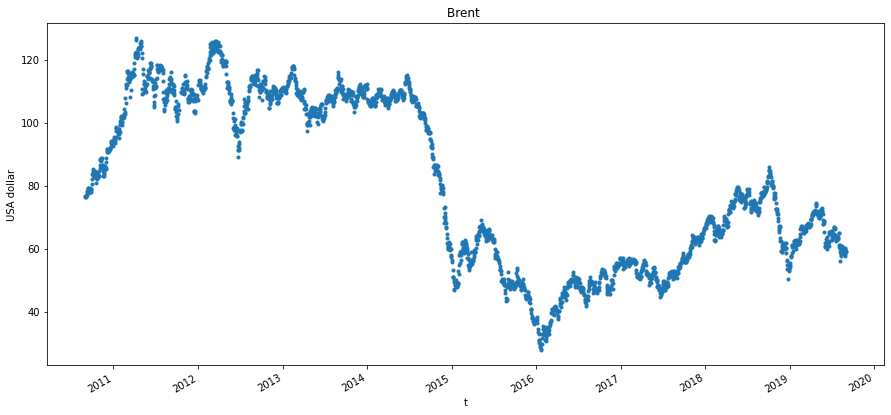

In [169]:
brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

недельный ресемплинг:

In [170]:
brent_data_weekly=brent_data.resample('W').mean()
brent_data_weekly

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.200000,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.000000,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.000000,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.000000,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-04,62.791667,2019.0,7.500000,16.166667,3.000000,212.666667,31.0,2.666667,0.000000,0.000000,0.000000
2019-08-11,58.236667,2019.0,8.000000,7.666667,3.000000,219.666667,32.0,2.666667,0.000000,0.000000,0.000000
2019-08-18,59.033333,2019.0,8.000000,14.666667,3.000000,226.666667,33.0,2.666667,0.000000,0.000000,0.000000


Text(0.5, 0, 't')

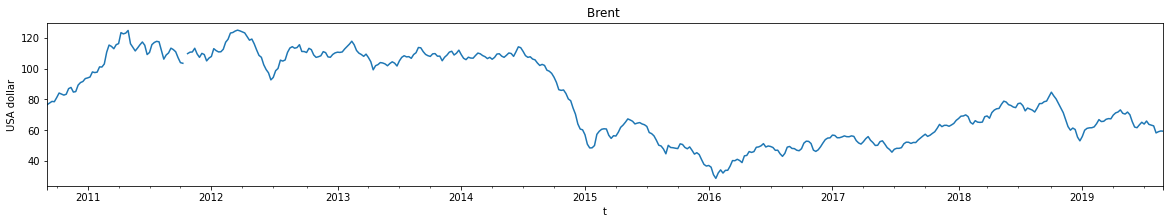

In [171]:
brent_data_weekly['Значение'].plot( figsize=( 20, 3 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [172]:
brent_data_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Значение         469 non-null    float64
 1   year             469 non-null    float64
 2   month            469 non-null    float64
 3   dayofmonth       469 non-null    float64
 4   quarter          469 non-null    float64
 5   dayofyear        469 non-null    float64
 6   weekofyear       469 non-null    float64
 7   dayofweek        469 non-null    float64
 8   is_holiday       469 non-null    float64
 9   is_prev_holiday  469 non-null    float64
 10  is_next_holiday  469 non-null    float64
dtypes: float64(11)
memory usage: 44.1 KB


видно пропуск в данных

In [173]:
brent_data_weekly.loc[pd.isnull(brent_data_weekly['Значение'])].index

DatetimeIndex(['2011-10-16'], dtype='datetime64[ns]', name='Дата', freq='W-SUN')

In [174]:
brent_data_weekly.index.get_loc('2011-10-16')

58

In [175]:
brent_data_weekly[57:60]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-09,103.476667,2011.0,10.0,5.666667,4.0,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.0,21.333333,4.0,294.333333,42.0,4.333333,0.0,0.000000,0.0


In [0]:
brent_data_weekly['Значение'][58]=np.mean([brent_data_weekly['Значение'][57],brent_data_weekly['Значение'][59]])

In [177]:
brent_data_weekly[57:60]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-09,103.476667,2011.0,10.0,5.666667,4.0,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,106.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.0,21.333333,4.0,294.333333,42.0,4.333333,0.0,0.000000,0.0


первые разности

In [0]:
d_brent_data = brent_data_weekly['Значение'].values[1:]- brent_data_weekly['Значение'].values[:-1]

Text(0.5, 1.0, 'Brent')

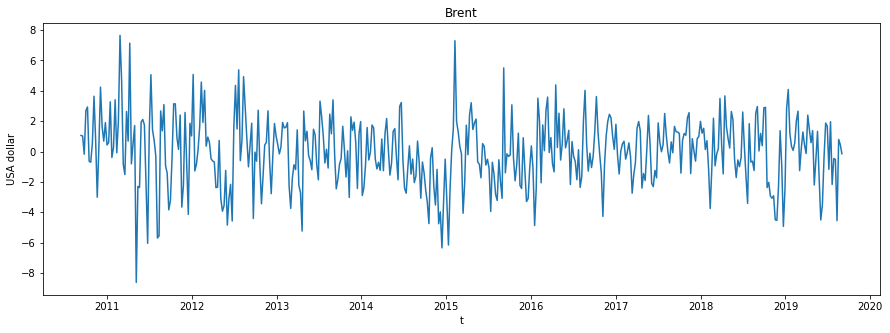

In [179]:
plt.figure(figsize=(15,5))
plt.plot(brent_data_weekly.index[1:],d_brent_data)
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.title('Brent')

добавим курс рубля к доллару

In [180]:
dollar_data = pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx', index_col=[1])
dollar_data.drop(['nominal','cdx'], axis=1,inplace = True)
dollar_data

,curs
data,
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771
...,...
2019-08-27,65.9735
2019-08-28,66.2608
2019-08-29,66.4127


In [181]:
dollar_weekly=dollar_data.resample('W').mean()
dollar_weekly

,curs
data,
2010-09-05,30.76125
2010-09-12,30.79402
2010-09-19,30.84672
2010-09-26,30.99920
2010-10-03,30.52764
...,...
2019-08-04,63.75872
2019-08-11,65.14700
2019-08-18,65.62408


Text(0.5, 0, 't')

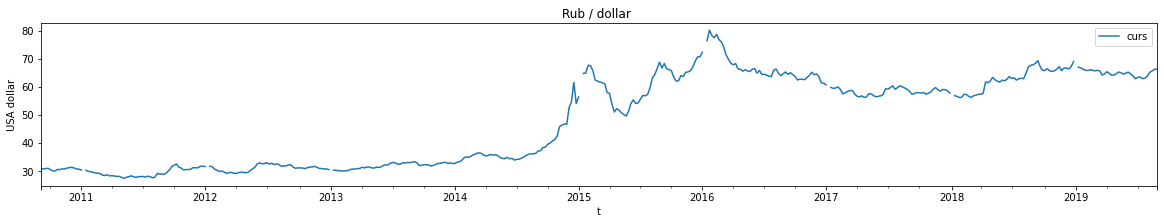

In [182]:
dollar_weekly.plot( figsize=( 20, 3 ), title='Rub / dollar ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [183]:
dollar_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   curs    462 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


In [184]:
missing_dollars=dollar_weekly.loc[pd.isnull(dollar_weekly['curs'])].index
missing_dollars

DatetimeIndex(['2011-01-09', '2012-01-08', '2013-01-06', '2015-01-11',
               '2016-01-10', '2017-01-08', '2018-01-07', '2019-01-06'],
              dtype='datetime64[ns]', name='data', freq=None)

In [185]:
missing_index=[]
for week in missing_dollars:
  missing_index.append(dollar_weekly.index.get_loc(week))
missing_index

[18, 70, 122, 227, 279, 331, 383, 435]

In [0]:
for index in missing_index:
  dollar_weekly['curs'][index]=np.mean([dollar_weekly['curs'][index-1],dollar_weekly['curs'][index+1]])


In [187]:
dollar_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   curs    470 non-null    float64
dtypes: float64(1)
memory usage: 27.3 KB


In [0]:
d_dollar_weekly=dollar_weekly['curs'].values[1:]- dollar_weekly['curs'].values[:-1]

In [189]:
data_weekly=pd.DataFrame(index=dollar_weekly.index[1:])
data_weekly['brent_price']=d_brent_data
data_weekly['curs']=d_dollar_weekly
data_weekly.head()

,brent_price,curs
data,,
2010-09-12,1.057333,0.03277
2010-09-19,1.020000,0.05270
2010-09-26,-0.175000,0.15248
2010-10-03,2.693333,-0.47156
2010-10-10,2.935000,-0.45426


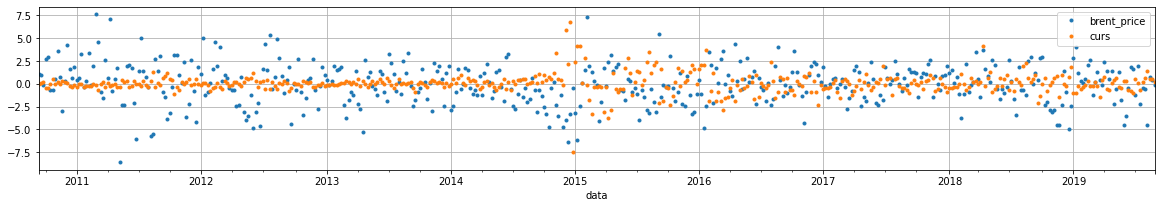

In [190]:
data_weekly.plot(figsize=(20,3), style='.', grid=True)

In [191]:
# stat до 2014:
data_upto2014=data_weekly[:(17+3*52)]
data_upto2014.describe()


,brent_price,curs
count,173.000000,173.000000
mean,0.204517,0.011238
std,2.533887,0.360246
min,-8.621667,-1.114340
25%,-1.190000,-0.208520
50%,0.430000,0.015320
75%,1.845000,0.217160
max,7.650000,1.337900


In [192]:
# stat до 2015-2016:
data_2015_2016=data_weekly[(4*52):(17+5*52)]
data_2015_2016.describe()

,brent_price,curs
count,69.000000,69.000000
mean,-0.957005,0.496993
std,2.436808,2.166811
min,-6.346667,-7.472720
25%,-2.530000,-0.359660
50%,-0.864000,0.428300
75%,0.251667,1.589680
max,7.296667,6.817480


In [193]:
# stat после 2016:
data_after2016=data_weekly[(17+5*52):]
data_after2016.describe()

,brent_price,curs
count,192.000000,192.000000
mean,0.117908,-0.022095
std,1.903608,0.953990
min,-4.930000,-2.858640
25%,-1.107875,-0.604025
50%,0.211667,-0.051400
75%,1.371583,0.508057
max,4.386000,4.100200


Видим, что c 4-го квартала 2014 г и до конца 2015 года, дневные разницы валюты сильно скакали, их  std увеличился в 6 раз по сравнению с предыдущим периодом. С началом 2016 расбросы более менее стибилизировались. Будем тренировать можель на 2016-2018 и предсказывать 1-ю неделю 2019 

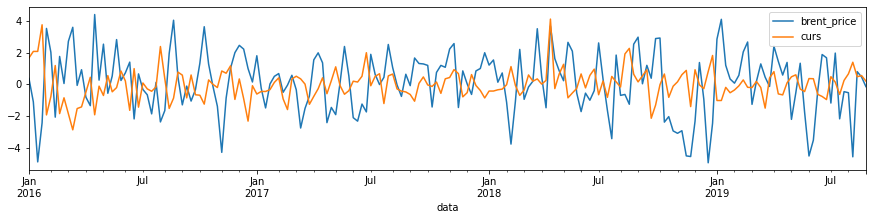

In [194]:
data_after2016.plot(figsize=(15,3))

Добавим признаков по календарю

In [0]:
X3 = data_after2016.index.get_level_values('data')

неделя по счету от начала года

In [196]:
X3_1 = pd.to_datetime(X3).week
X3_1 

Int64Index([53,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
           dtype='int64', name='data', length=192)

In [197]:
data_after2016['week_n']=X3_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
X_train=data_after2016[:52*3]
X_train.tail()

,brent_price,curs,week_n
data,,,
2018-11-25,-4.536667,-1.39894,47
2018-12-02,-2.316667,0.91634,48
2018-12-09,1.370000,-0.03502,49
2018-12-16,-0.936667,-0.27368,50
2018-12-23,-4.930000,0.80056,51


In [199]:
y_train=data_after2016['brent_price'][1:52*3+1]
y_train

data
2016-01-10   -1.100500
2016-01-17   -4.874000
2016-01-24   -2.418000
2016-01-31    3.512500
2016-02-07    2.015500
                ...   
2018-12-02   -2.316667
2018-12-09    1.370000
2018-12-16   -0.936667
2018-12-23   -4.930000
2018-12-30   -2.443667
Freq: W-SUN, Name: brent_price, Length: 156, dtype: float64

In [200]:
X_test=data_after2016[52*3:-1]
X_test.head()

,brent_price,curs,week_n
data,,,
2018-12-30,-2.443667,1.812973,52
2019-01-06,2.838000,-1.016150,1
2019-01-13,4.085667,-1.016150,2
2019-01-20,1.196667,-0.190153,3
2019-01-27,0.335000,-0.529340,4


In [201]:
y_test=data_after2016['brent_price'][52*3+1:]
y_test.head()

data
2019-01-06    2.838000
2019-01-13    4.085667
2019-01-20    1.196667
2019-01-27    0.335000
2019-02-03    0.073333
Freq: W-SUN, Name: brent_price, dtype: float64

In [0]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [0]:
from sklearn.metrics import r2_score

In [0]:
gbm = xgb.XGBRegressor()

In [0]:
# reg_cv = GridSearchCV(gbm, {'max_depth': [2,3], 'n_estimators': [100,300,500,1000]}, verbose=1)
# reg_cv.fit(X_train,y_train)

In [0]:
reg_cv.best_params_={'max_depth': 2, 'n_estimators': 100}

In [0]:
gbm = xgb.XGBRegressor(**reg_cv.best_params_)

In [208]:
gbm.fit(X_train,y_train)

[20:00:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_train_pred=gbm.predict(X_train)

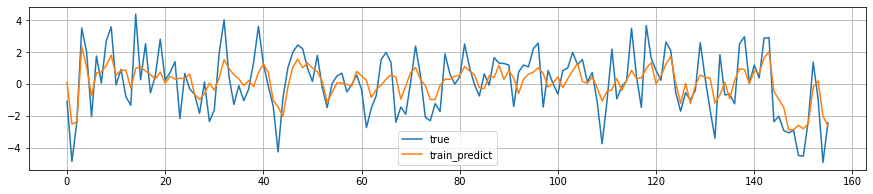

In [210]:
plt.figure(figsize=(15,3))
plt.plot(y_train.values, label='true')
plt.plot(y_train_pred, label='train_predict')

plt.legend()
plt.grid()

In [244]:
r2_score(y_train.values,y_train_pred), mean_absolute_percentage_error(y_train.values,y_train_pred)

(0.5197414102885339, 160.96486505447066)

In [0]:
y_pred = gbm.predict(X_test)


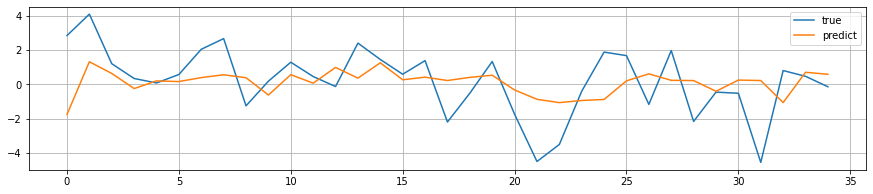

In [213]:
plt.figure(figsize=(15,3))
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predict')

plt.legend()
plt.grid()

In [262]:
r1=r2_score(y_test.values,y_pred)
r1

0.04670416647280429

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [263]:
mape1=mean_absolute_percentage_error(y_test.values,y_pred)
mape1

142.05599827927782

Уберем все дополнительные признаки и будем обучать модель только по Brent

In [217]:
X_train2=data_after2016['brent_price'][:52*3].values.reshape(156,1)
X_train2.shape

(156, 1)

In [218]:
y_train2=y_train.values.reshape(156,1)
y_train2.shape

(156, 1)

In [219]:
X_test2=data_after2016['brent_price'][52*3:-1].values.reshape(35,1)
X_test.shape

(35, 3)

In [0]:
y_test2=data_after2016['brent_price'][52*3+1:].values.reshape(35,1)

In [0]:
gbm = xgb.XGBRegressor(**reg_cv.best_params_)

In [222]:
gbm.fit(X_train2,y_train2)

[20:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_train_pred2=gbm.predict(X_train2)

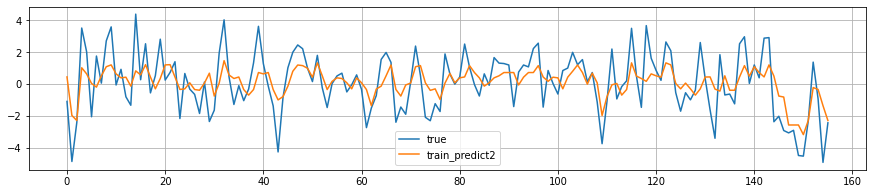

In [224]:
plt.figure(figsize=(15,3))
plt.plot(y_train.values, label='true')
plt.plot(y_train_pred2, label='train_predict2')

plt.legend()
plt.grid()

In [243]:
r2_score(y_train.values,y_train_pred2), mean_absolute_percentage_error(y_train.values,y_train_pred2)

(0.4461541453753387, 139.66961932561506)

r2 на трейне упал

In [0]:
y_test_pred2=gbm.predict(X_test2)

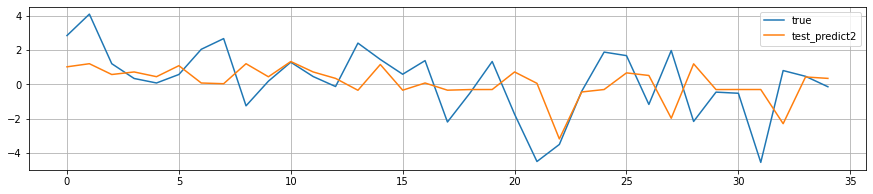

In [227]:
plt.figure(figsize=(15,3))
plt.plot(y_test.values, label='true')
plt.plot(y_test_pred2, label='test_predict2')

plt.legend()
plt.grid()

In [264]:
r2=r2_score(y_test.values,y_test_pred2)
r2

-0.039272339285641555

In [265]:
mape2=mean_absolute_percentage_error(y_test.values,y_test_pred2)
mape2

123.32958378308972

по r2 предсказание теста без дополнительных признаков стал хуже, а MAPE чуть улучшился

Оставим только brent и курс валют (т.е. без номера недели)

In [0]:
X_train3=X_train.drop(columns='week_n')
X_test3=X_test.drop(columns='week_n')

In [234]:
gbm.fit(X_train3,y_train)

[20:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [242]:
y_train_pred3=gbm.predict(X_train3)
r2_score(y_train.values,y_train_pred3), mean_absolute_percentage_error(y_train.values,y_train_pred3)

(0.5241127189101373, 150.90962480812175)

без номера недели r2 на трейне лучше

In [0]:
y_test_pred3=gbm.predict(X_test3)

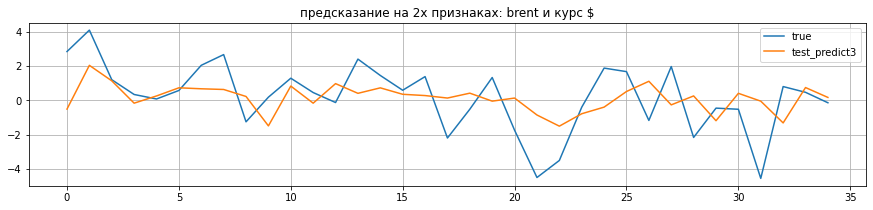

In [237]:
plt.figure(figsize=(15,3))
plt.plot(y_test.values, label='true')
plt.plot(y_test_pred3, label='test_predict3')
plt.title('предсказание на 2х признаках: brent и курс $')
plt.legend()
plt.grid()

In [266]:
r3=r2_score(y_test.values,y_test_pred3)
r3

0.14428515794571983

без номера недели r2 на тесте лучше

In [267]:
mape3=mean_absolute_percentage_error(y_test.values,y_test_pred3)
mape3

152.9893063342006

без номера недели MAPE на тесте хуже

теперь просто обучим прямую модель в зависимости от курса доллара

In [0]:
X_train4=data_after2016['curs'][:52*3].values.reshape(156,1)
y_train4=data_after2016['brent_price'][:52*3].values.reshape(156,1)

In [0]:
X_test4=data_after2016['curs'][52*3:].values.reshape(36,1)
y_test4=data_after2016['brent_price'][52*3:].values.reshape(36,1)

In [255]:
gbm.fit(X_train4,y_train4)

[20:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [257]:
y_train_pred4=gbm.predict(X_train4)
r2_score(y_train4,y_train_pred4), mean_absolute_percentage_error(y_train4,y_train_pred4)

(0.4542090524284409, 263.6941513960107)

In [270]:
y_test_pred4=gbm.predict(X_test4)
r4=r2_score(y_test4,y_test_pred4) 
mape4=mean_absolute_percentage_error(y_test4,y_test_pred4)
r4, mape4

(0.049771530611952164, 148.76074772970256)

In [0]:
R2=[r1,r2,r3,r4]
MAPE=[mape1,mape2,mape3,mape4]

([<matplotlib.axis.XTick at 0x7fe8a1ec0400>,
 [Text(0, 0, 'h=1, brent, $, week'),
  Text(0, 0, 'h=1, brent'),
  Text(0, 0, 'h=1, brent, $'),
  Text(0, 0, 'direct brent by $')])

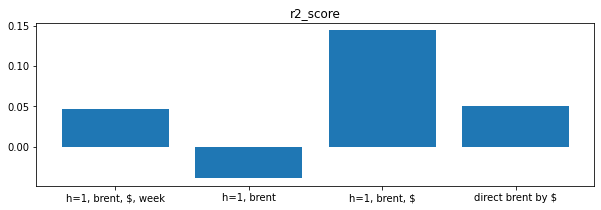

In [290]:
plt.figure(figsize=(10,3))
plt.bar(np.arange(4),R2)
plt.title('r2_score')
plt.xticks(np.arange(4),labels=['h=1, brent, $, week', 'h=1, brent', 'h=1, brent, $', 'direct brent by $'])

([<matplotlib.axis.XTick at 0x7fe8a1e99ac8>,
 [Text(0, 0, 'h=1, brent, $, week'),
  Text(0, 0, 'h=1, brent'),
  Text(0, 0, 'h=1, brent, $'),
  Text(0, 0, 'direct brent by $')])

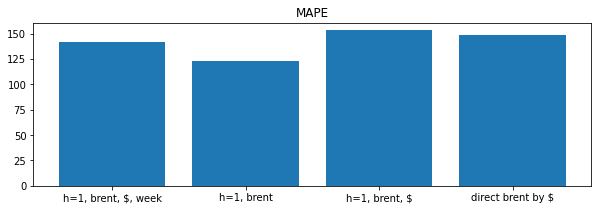

In [291]:
plt.figure(figsize=(10,3))
plt.bar(np.arange(4),MAPE)
plt.title('MAPE')
plt.xticks(np.arange(4),labels=['h=1, brent, $, week', 'h=1, brent', 'h=1, brent, $', 'direct brent by $'])

Вывод по MAPE: судя по последним 2м столбикам, если предсказывать цену нефти просто в зависимости от курса доллара, то ошибка предсказания не особо сильно падает по сравнению с h1 brent & dollar.
Если смотреть еще на r2, то лучшее предсказание все-таки дает h1 brent & dollar
